# Proyecto módulo 3



# Fraude en tarjeta de crédito

## Contenido
El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.
Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284,807 transacciones. El conjunto de datos está muy desequilibrado, la clase positiva (fraudes) representa el 0,172 % de todas las transacciones.

Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no podemos proporcionar las características originales ni más información general sobre los datos. Las características V1, V2, … V28 son los principales componentes obtenidos con PCA, las únicas características que no han sido transformadas con PCA son 'Tiempo' y 'Cantidad'. La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La función 'Cantidad' es la cantidad de la transacción, esta función se puede utilizar para el aprendizaje sensible a los costos dependiente del ejemplo. Feature 'Class' es la variable de respuesta y toma valor 1 en caso de fraude y 0 en caso contrario.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/EXPO/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve,auc, confusion_matrix, classification_report


Vamos a ver si las variables Amount y Time están distribuidas de forma normal para aplicarle un standard scaler, ya que son las variables que divergen en medida y puede ocasionar problemas a la hora de implementar un modelo. En caso negativo, utilizaremos otro tipo de scaler.


 mu = 88.35 and sigma = 250.12



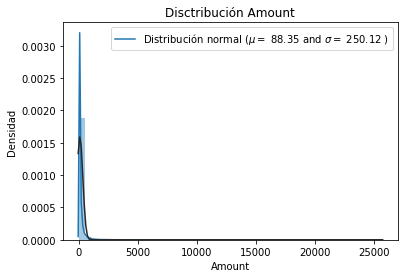

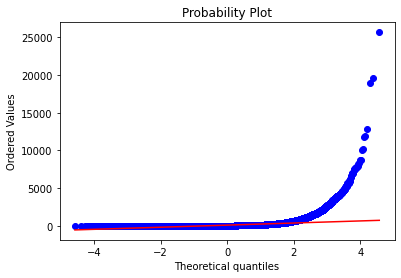

In [7]:
sns.distplot(df['Amount'] , fit=stats.norm); 

# Obtener los parámetros ajustados utilizados por la función
(mu, sigma) = stats.norm.fit(df['Amount'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Labels
plt.legend(['Distribución normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Densidad')
plt.title('Disctribución Amount')

#Mostramos QQ-plot
fig = plt.figure()
res = stats.probplot(df['Amount'], plot=plt)
plt.show()


 mu = 94813.86 and sigma = 47488.06



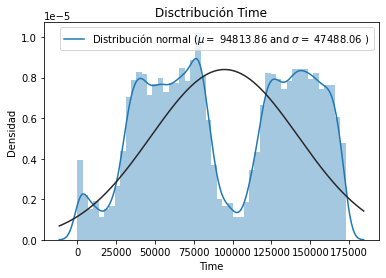

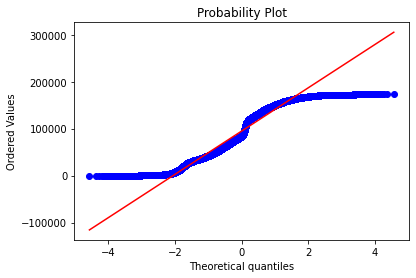

In [8]:
sns.distplot(df['Time'] , fit=stats.norm); 

# Obtener los parámetros ajustados utilizados por la función
(mu, sigma) = stats.norm.fit(df['Time'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Labels
plt.legend(['Distribución normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Densidad')
plt.title('Disctribución Time')

#Mostramos QQ-plot
fig = plt.figure()
res = stats.probplot(df['Time'], plot=plt)
plt.show()

En este caso aplicaremos lo siguiente:

In [9]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))

In [10]:
df.drop(['Time', 'Amount'], axis = 1, inplace = True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


# Vamos e echar un vistazo a la correlación entre las variables

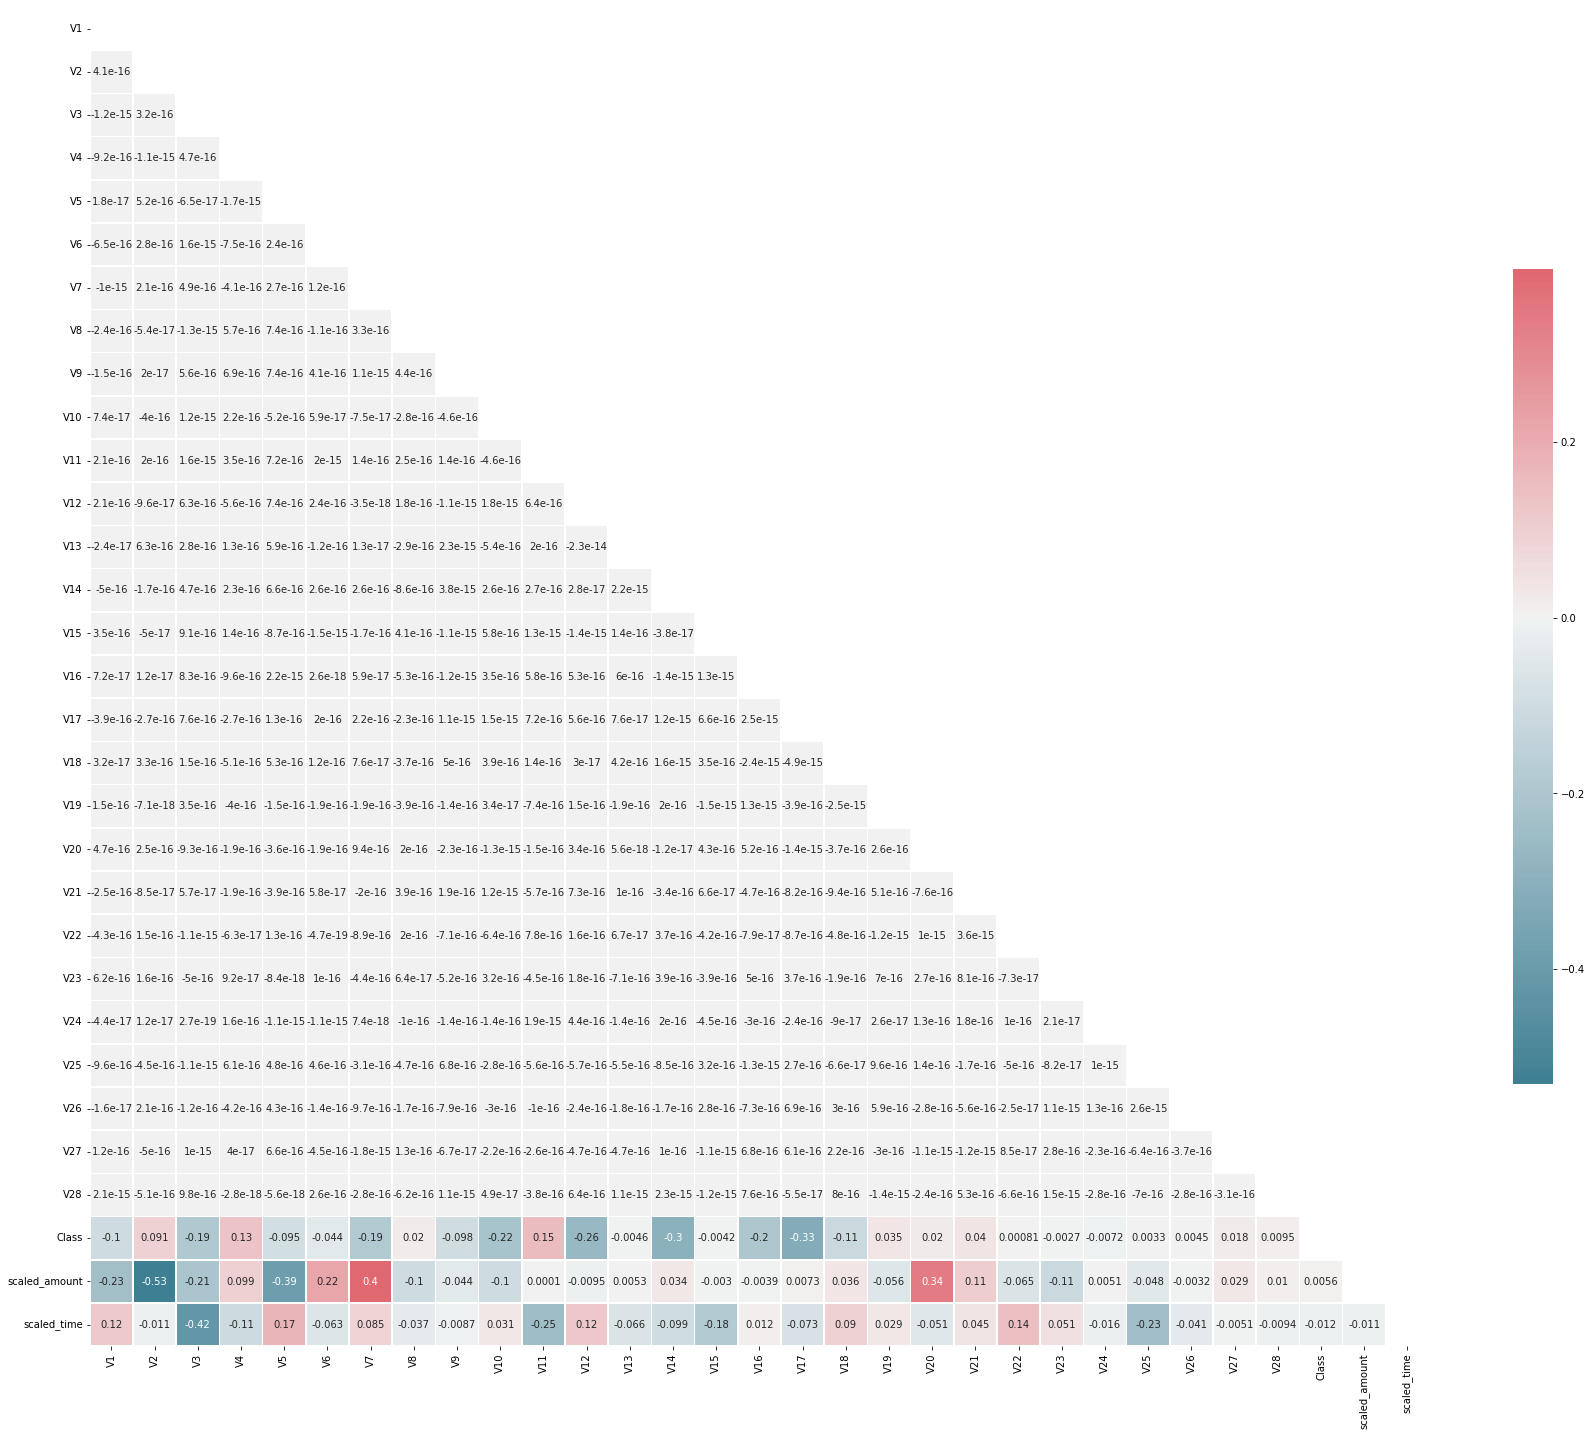

In [11]:
corr = df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30,30))
 
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

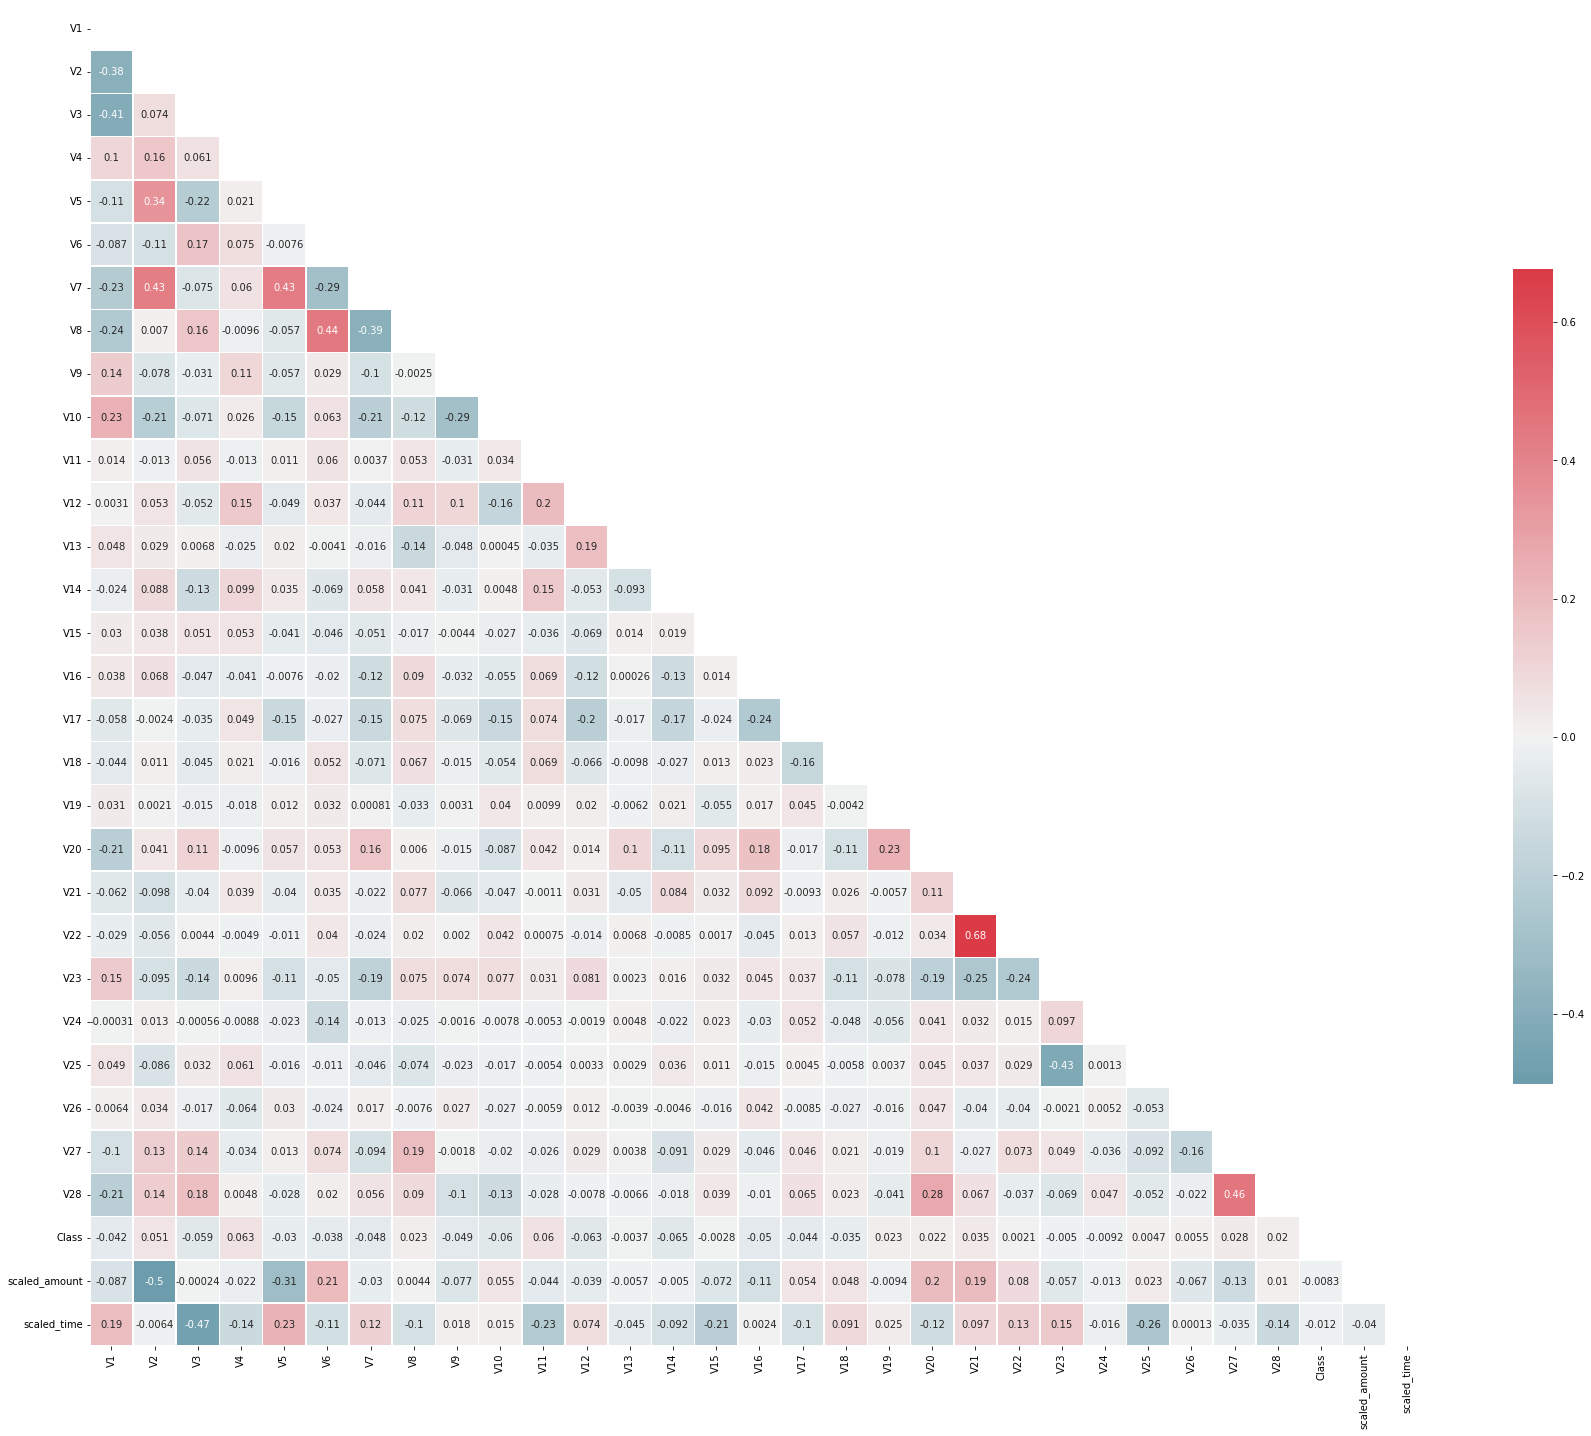

In [12]:
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30,30))
 
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

# Como podemos ver, no hay correlación alta en ninguna variable, así que procedemos a montar un modelo de clasificación para predecir el fraude.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2, random_state=55)

In [14]:
rf = RandomForestClassifier()

In [15]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
y_predict = rf.predict(X_test)

In [17]:
# ahora vamos a ver qué tal lo ha hecho el random forest
pred_proba = rf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

roc_auc

0.9518334706634722

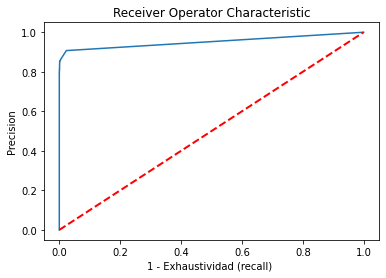

In [18]:
# vamos a pintar la curva del ROC / AUC
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--')
plt.xlabel('1 - Exhaustividad (recall) ')
plt.ylabel('Precision')
plt.title('Receiver Operator Characteristic')
plt.show()

# Vemos que el modelo se comporta bien, presentando una curva por encima de la diagonal

In [19]:
print(confusion_matrix(y_test, y_predict))

[[56863     2]
 [   21    76]]


In [20]:
# F1-score, 
# la precisión del modelo y el recall
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.97      0.78      0.87        97

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Estas medidas nos ayudan a evaluar también cómo de bien está funcionando nuestro clasificador.

La precisión nos ayuda a evaluar cómo de efectivo es el modelo a la hora de encontrar los valores para una categoría en concreto. Se define como el porcentaje de valores correctos que has conseguido predecir sobre el total de las predicciones positivas que has hecho.
 

La exhaustividad (recall) nos ayuda a saber cómo de efectivo es el modelo a la hora de conseguir acertar las categorías de los datos. Se define como el porcentaje de valores correctos que has conseguido predecir sobre el total de valores correctos que hay en los datos.
 

Por último, el F1-score nos combina los valores de precisión y exhaustividad (recall), dándonos una visión global de la efectividad del modelo. Matemáticamente, se define como el la media armónica entre precisión y exhaustividad (recall).

In [21]:

features = X_train
feature_list = X_train.columns

# Guardamos los valores numéricos de la importancia de cada feature
importances = list(rf.feature_importances_)

# Vamos a crear un lista de tuplas con la variable independiente de entrada y su importancia
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]

# Ordenamos las importancias de las variables para tener las más importantes al principio
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Mostramos las variables y sus importancias
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: V12                  Importance: 0.153
Variable: V17                  Importance: 0.1405
Variable: V14                  Importance: 0.133
Variable: V10                  Importance: 0.0753
Variable: V16                  Importance: 0.0618
Variable: V11                  Importance: 0.0515
Variable: V9                   Importance: 0.0409
Variable: V18                  Importance: 0.0303
Variable: V7                   Importance: 0.03
Variable: V4                   Importance: 0.0296
Variable: V3                   Importance: 0.0196
Variable: V26                  Importance: 0.0177
Variable: V21                  Importance: 0.0176
Variable: V2                   Importance: 0.0145
Variable: V1                   Importance: 0.0143
Variable: V6                   Importance: 0.0134
Variable: scaled_amount        Importance: 0.0133
Variable: V27                  Importance: 0.0128
Variable: V15                  Importance: 0.0126
Variable: V20                  Importance: 0.0124
Vari

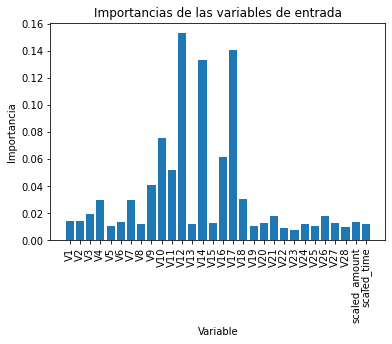

In [22]:
# Representación gráfica
# creamos una lista con tantas variables como vayamos a pintar
x_values = list(range(len(importances)))

# Creamos un gráfico de barras
plt.bar(x_values, importances, orientation = 'vertical')

# Ponemos los nombres de las variables en el eje x
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
# Ponemos los nombres de los ejes y el título
plt.ylabel('Importancia'); plt.xlabel('Variable'); plt.title('Importancias de las variables de entrada');

# Obtenemos un buen valor pero vamos a intentar mejorarlo utilizando un modelo de ensamblado

In [23]:
adab = AdaBoostClassifier()

In [24]:
adab.fit(X_train, y_train)

AdaBoostClassifier()

In [25]:
y_predict = adab.predict(X_test)

In [26]:
pred_proba = adab.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, pred_proba[:, 1])
roc_auc1 = auc(fpr, tpr)

roc_auc1

0.9813982474317451

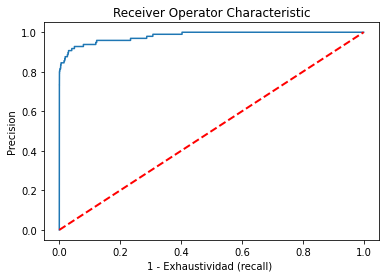

In [27]:
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--')
plt.xlabel('1 - Exhaustividad (recall) ')
plt.ylabel('Precision')
plt.title('Receiver Operator Characteristic')
plt.show()

In [28]:
print(confusion_matrix(y_test, y_predict))

[[56852    13]
 [   28    69]]


In [29]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56865
           1       0.84      0.71      0.77        97

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [30]:
features = X_train
feature_list = X_train.columns

# Guardamos los valores numéricos de la importancia de cada feature
importances = list(adab.feature_importances_)

# Vamos a crear un lista de tuplas con la variable independiente de entrada y su importancia
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]

# Ordenamos las importancias de las variables para tener las más importantes al principio
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Mostramos las variables y sus importancias
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: V4                   Importance: 0.12
Variable: V14                  Importance: 0.08
Variable: V17                  Importance: 0.08
Variable: scaled_amount        Importance: 0.08
Variable: V8                   Importance: 0.06
Variable: V2                   Importance: 0.04
Variable: V3                   Importance: 0.04
Variable: V6                   Importance: 0.04
Variable: V10                  Importance: 0.04
Variable: V12                  Importance: 0.04
Variable: V16                  Importance: 0.04
Variable: V24                  Importance: 0.04
Variable: scaled_time          Importance: 0.04
Variable: V1                   Importance: 0.02
Variable: V5                   Importance: 0.02
Variable: V7                   Importance: 0.02
Variable: V11                  Importance: 0.02
Variable: V13                  Importance: 0.02
Variable: V18                  Importance: 0.02
Variable: V19                  Importance: 0.02
Variable: V21                  Importanc

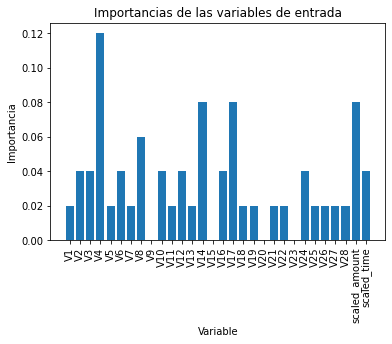

In [31]:

# Representación gráfica
# creamos una lista con tantas variables como vayamos a pintar
x_values = list(range(len(importances)))

# Creamos un gráfico de barras
plt.bar(x_values, importances, orientation = 'vertical')

# Ponemos los nombres de las variables en el eje x
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
# Ponemos los nombres de los ejes y el título
plt.ylabel('Importancia'); plt.xlabel('Variable'); plt.title('Importancias de las variables de entrada');

# Observamos cuanto varía tras el ensamblado:

In [32]:
mejora = roc_auc1 - roc_auc
mejora

0.02956477676827285